In [142]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
import cufflinks as cf
import plotly.offline as pyo
import plotly.graph_objs as go
import pandas as pd
from plotly.subplots import make_subplots

df_kghm = pd.read_csv('kgh_d.csv')
df_copper = pd.read_csv('ca_c_f_d.csv')

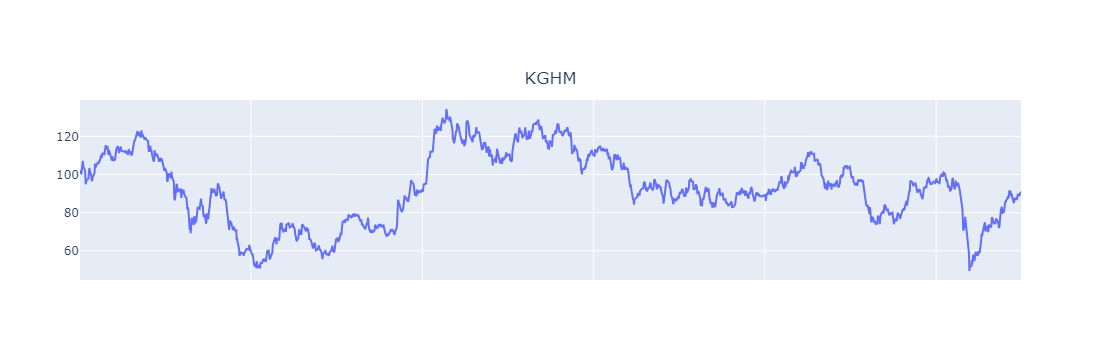

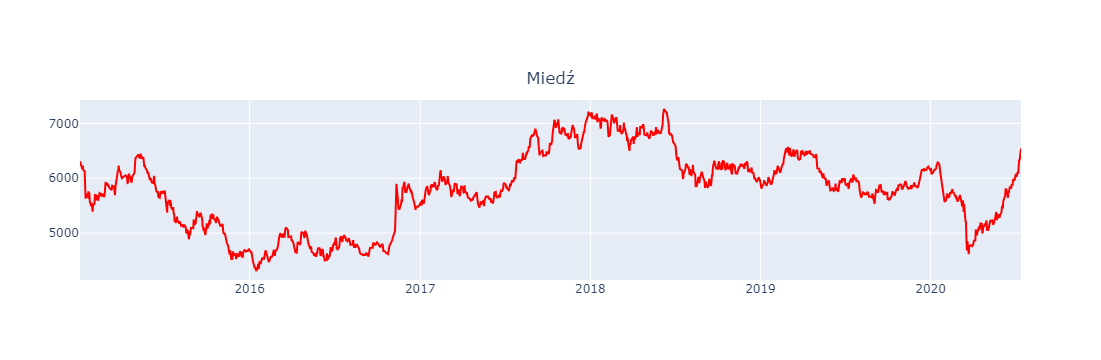

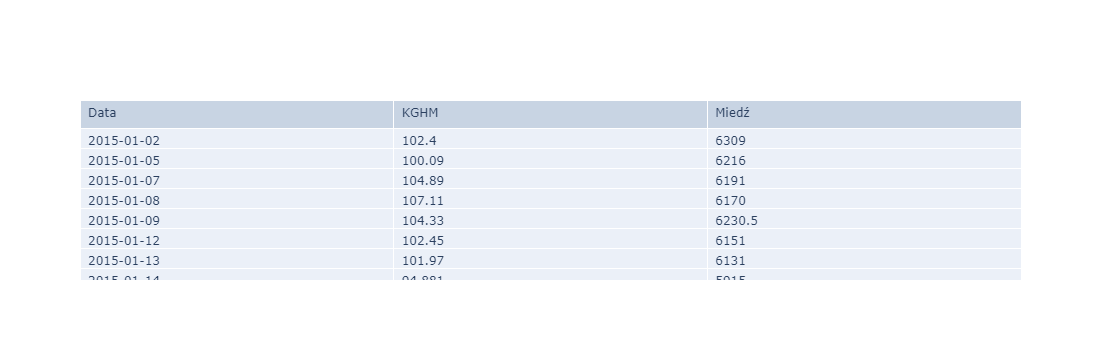

In [144]:
trace_kghm = go.Scatter(x=df_kghm['Data'], y=df_kghm['Zamkniecie'], mode='lines', name='KGHM')
trace_copper = go.Scatter(x=df_copper['Data'], y=df_copper['Zamkniecie'], mode='lines', name='Miedź', line=dict(color='red'))

layout_kghm = go.Layout(title='KGHM', xaxis=dict(showticklabels=False),title_x=0.5, title_y=0.8)
layout_copper = go.Layout(title='Miedź', title_x=0.5, title_y=0.8)

fig1 = go.Figure(data=[trace_kghm], layout=layout_kghm)
fig2 = go.Figure(data=[trace_copper], layout=layout_copper)

fig3 = go.Figure(data=[go.Table(
    header=dict(values=['Data', 'KGHM', 'Miedź'],
                align='left'),
    cells=dict(values=[df_kghm['Data'], df_kghm['Zamkniecie'], df_copper['Zamkniecie']],
               align='left'))
])


fig1.show()
fig2.show()
fig3.show()